#### Imports

In [1]:
import sys
import re
from os import listdir
from os.path import join, isdir
import matplotlib.pyplot as plt
import numpy as np

In [2]:
regex_alpha_words = re.compile(r'[^a-zA-Z0-9]') # Cadenas alfanumericas sin acentos

In [3]:
# Extrae los tokens en una lista
def tokenizer(line):
    result = []
    initial_list_split = line.split()
    for token in initial_list_split:
        word = re.sub(regex_alpha_words,'',token)
        if word != '':
            result.append(word)
    return result


In [9]:
list_terms={}

with open("texto.txt",'r',encoding='utf-8') as f:
    for line in f:
        terms_list = tokenizer(line)
        for term in terms_list:
            if term in list_terms:
                list_terms[term]+=1
            else:
                list_terms[term]= 1   

In [10]:
# Ordenar el diccionario por clave
list_terms_sorted={}
for k, value in sorted(list_terms.items(),key=lambda x: x[1], reverse=True):
    list_terms_sorted[k]=value

#print(list_terms_sorted.items())

#### Gráficos 

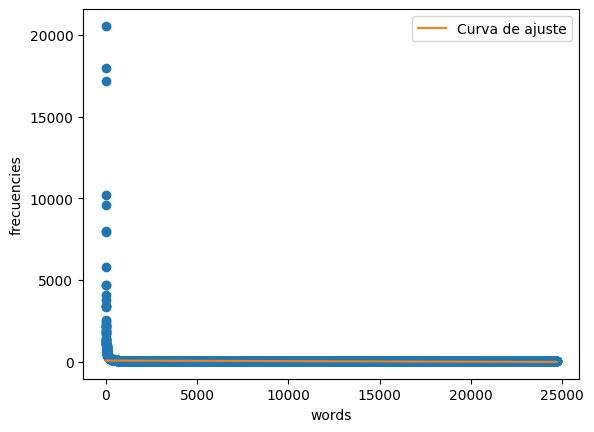

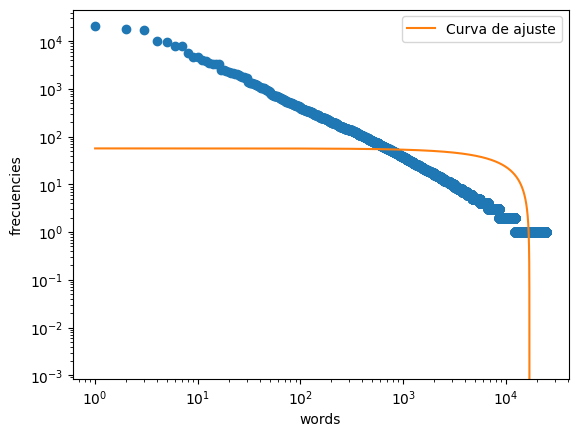

In [18]:
# Defino eje x e y
x = np.arange(1, len(list_terms_sorted) + 1)
y = nuevos_valores = [float(valor) for valor in list_terms_sorted.values()]

#Defino la curva de ajuste(Escala Normal)
coefs = np.polyfit(x, y, 1)
curva = np.poly1d(coefs)


# Graficar de puntos y la curva ajustada (Escala Normal)
plt.plot(x, y, 'o')
plt.plot(x, curva(x), label='Curva de ajuste')
plt.ylabel("frecuencies")
plt.xlabel("words")
plt.legend()
plt.show()



#Defino la curva de ajuste(Escala Log)
coefs = np.polyfit(x, y, 1)
curva = np.poly1d(coefs)


# Graficar de puntos y la curva ajustada (Escala Log)
plt.plot(x, y, 'o')
plt.plot(x, curva(x), label='Curva de ajuste')
plt.yscale("log")
plt.xscale("log")
plt.ylabel("frecuencies")
plt.xlabel("words")
plt.legend()
plt.show()

In [61]:
frecuencias= [0,0,0]
cantidad = len(list_terms)
for val in y:
    if(val <= 100):
        frecuencias[0] +=1
    if(val > 100 and val <= 1000):
        frecuencias[1] +=1
    if(val >= 10000):
        frecuencias[2] +=1
        
print("Cantidad terminos: "+ str(len(list_terms))+"\n \n")
print("Cantidad frec < 100: "+str(frecuencias[0]))
print("Proporcion: "+str(round(frecuencias[0]/cantidad*100,3))+"%\n \n")
print("Cantidad  100 < frec < 1000: "+str(frecuencias[1]))
print("Proporcion: "+str(round(frecuencias[1]/cantidad*100,3))+"%\n \n")
print("Cantidad  frec >= 1000: "+str(frecuencias[2]))
print("Proporcion: "+str(round(frecuencias[2]/cantidad*100,3))+"%")

Cantidad terminos: 24691
 

Cantidad frec < 100: 24279
Proporcion: 98.331%
 

Cantidad  100 < frec < 1000: 367
Proporcion: 1.486%
 

Cantidad  frec >= 1000: 4
Proporcion: 0.016%
